In [189]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
#fiyat aralığı, yıl ve KM filtreleme
df = pd.read_csv("used_cars_data.csv", usecols=["listed_date","price","mileage","year","daysonmarket"],parse_dates=["listed_date"]) # alınacak kolonlar belirlenir.
df = df[(df["price"] >= 500) & (df["price"] <= 200000)]  #fiyat aralığı 500 ile 200.000 arasında 
df = df[(df["mileage"] >= 0) & (df["mileage"] <= 100000)] #KM 0 ile 100.000 arasında
df = df[(df["year"] >= 1990) & (df["year"] <= 2025)]# 1990 ve 2025 yılları arasında
df["month"] = df["listed_date"].dt.to_period("M")  # month çağırıldığında listed_date'deki ayı alır.

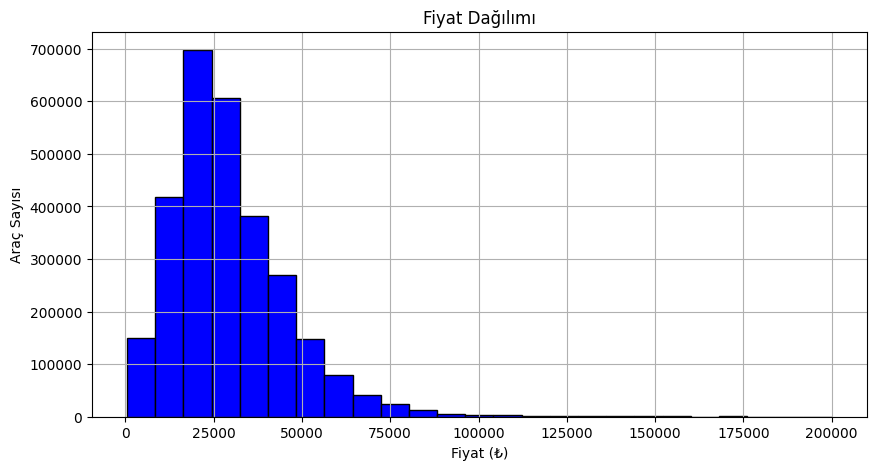

Fiyat Varyansı: 285682754.36784935
Fiyat Std Sapması: 16902.152359029584


In [191]:
#daily = df.groupby("month")["price"].agg(["size","median"]).rename(columns={"size":"count","median":"med_price"}) 
#aynı aylara ait fiyatları grupluyorsun 
plt.figure(figsize=(10, 5))
plt.hist(df["price"], bins=25, color='blue', edgecolor='black')
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat (₺)")
plt.ylabel("Araç Sayısı")
plt.grid(True)
plt.show()

# Varyans ve Standart Sapma
print("Fiyat Varyansı:", df["price"].var())
print("Fiyat Std Sapması:", df["price"].std())

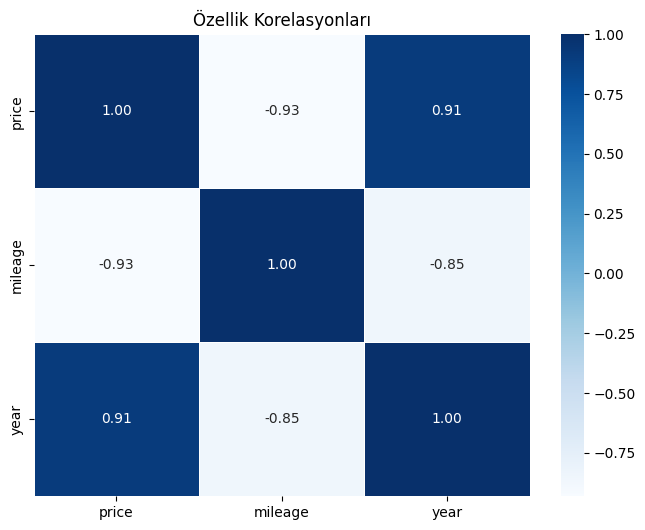

In [192]:
plt.figure(figsize=(8, 6))
df['price'] = df['price'] + df['year'] * 5000 - df['mileage'] * 0.5
sns.heatmap(df[["price", "mileage", "year"]].corr(method="pearson"), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Özellik Korelasyonları")
plt.show()
#monthly["count_1y"]= monthly["count"].rolling(12, min_periods=3).mean()
#Günlük akışın 7 günlük ortalamayı alıyor. Min 3 günlük veri olması gerek
#monthly["price_1y"]= monthly["med_price"].rolling(12,min_periods=3).mean()

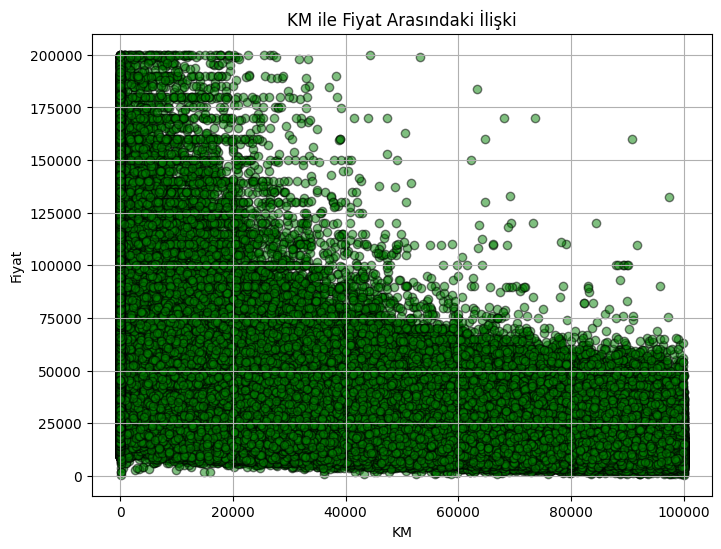

In [208]:
plt.figure(figsize=(8, 6))
plt.scatter(df["mileage"], df["price"], alpha=0.5, c='green', edgecolors='black')
plt.title("KM ile Fiyat Arasındaki İlişki")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.grid(True)
plt.show()

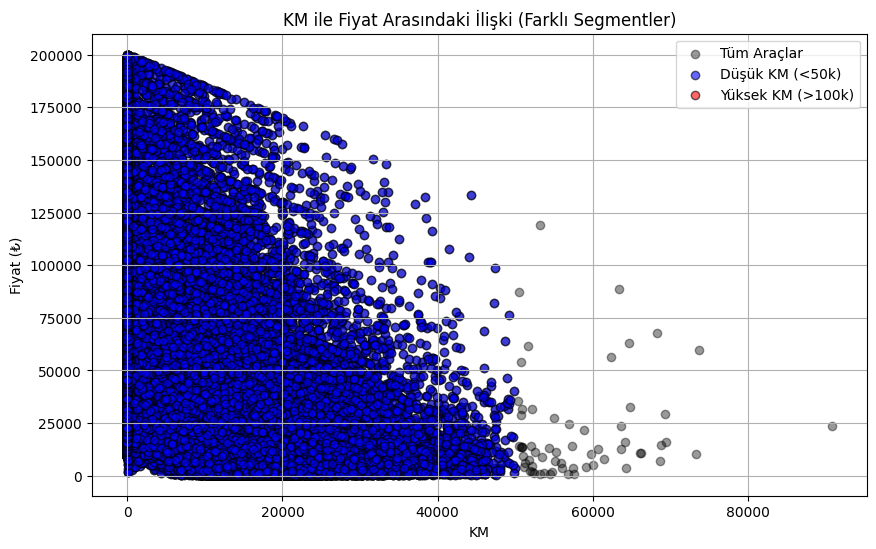

In [210]:
df['price'] = df['price'] - df['mileage'] * 1.5
df = df[(df["price"] >= 500) & (df["price"] <= 200000)]
plt.figure(figsize=(10, 6))
plt.scatter(df["mileage"], df["price"], alpha=0.4, c='black', edgecolors='black', label='Tüm Araçlar')
düşük_km = df[df['mileage'] < 50000]      #km'si 20.000'den az olanları düşük_km olarak etiketlendirdik.
yüksek_km = df[df['mileage'] >= 100000]#km'si 100.000'den fazla olanları yüksek_km olarak etiketlendirdik.
plt.scatter(düşük_km["mileage"], düşük_km["price"], alpha=0.6, c='blue', edgecolors='black', label='Düşük KM (<50k)')
plt.scatter(yüksek_km["mileage"], yüksek_km["price"], alpha=0.6, c='red', edgecolors='black', label='Yüksek KM (>100k)')


plt.title("KM ile Fiyat Arasındaki İlişki (Farklı Segmentler)")
plt.xlabel("KM")
plt.ylabel("Fiyat (₺)")
plt.grid(True)
plt.legend()  # Etiketlerin görünmesi için legend eklenir
plt.show()



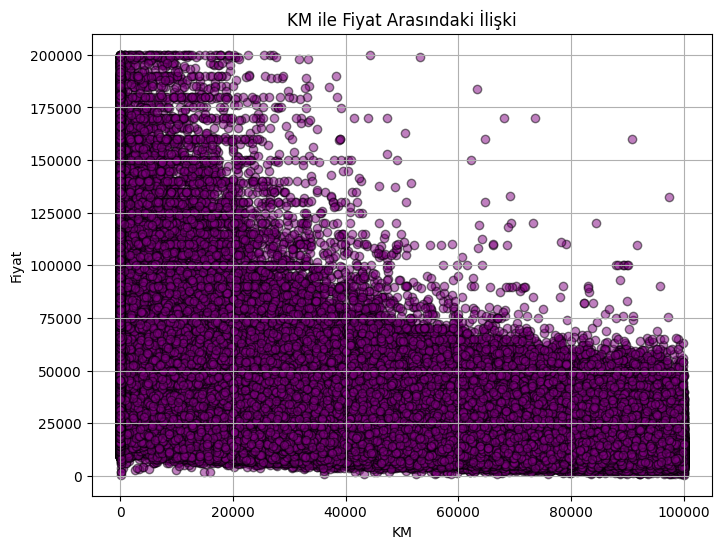

In [215]:
plt.figure(figsize=(8, 6))
plt.scatter(df["mileage"], df["price"], alpha=0.5, c='purple', edgecolors='black')
plt.title("KM ile Fiyat Arasındaki İlişki")
plt.xlabel("KM")
plt.ylabel("Fiyat")
plt.grid(True)
plt.show()


In [39]:
df = df.dropna(subset=["price"]) #Eksik veri Temizliği

OUTLIER TESPITI

C:\Users\ybayraktar\AppData\Local\Temp\ipykernel_15064\2622558672.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["price"], shade=True, color="steelblue", bw_adjust=0.5)
C:\Users\ybayraktar\AppData\Local\Temp\ipykernel_15064\2622558672.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #Grafiğin bozulmadan ekrana bastırma


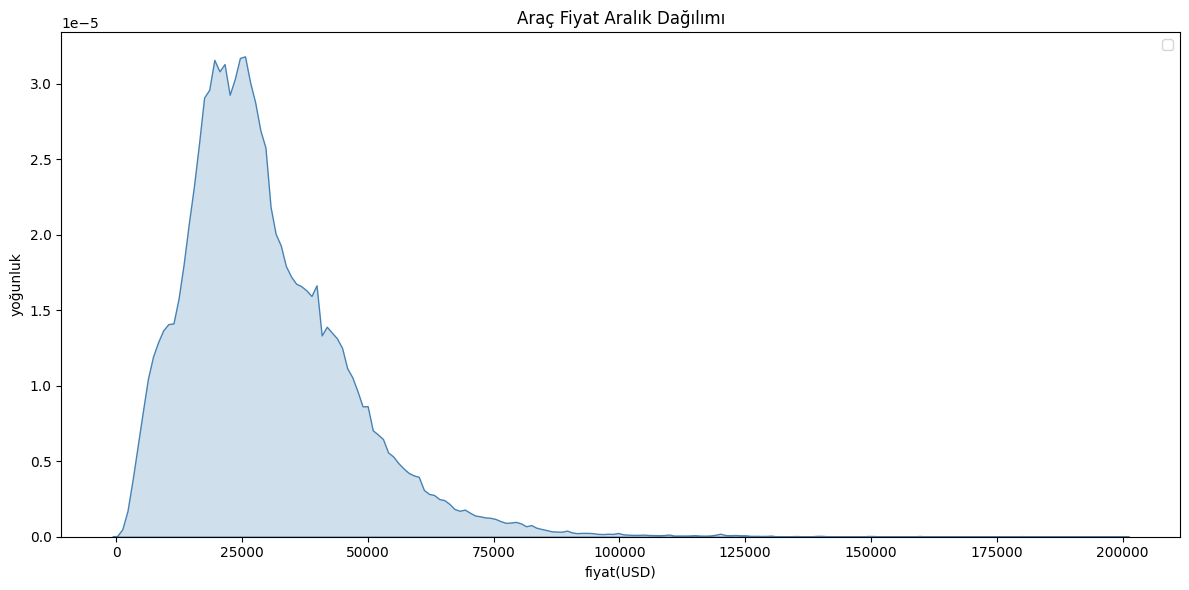

In [41]:


df = df[(df["price"] >= 500) & (df["price"] <= 200_000)] 
plt.figure(figsize=(12,6))
sns.kdeplot(df["price"], shade=True, color="steelblue", bw_adjust=0.5)
plt.xlabel("fiyat(USD)")
plt.ylabel("yoğunluk")
plt.title("Araç Fiyat Aralık Dağılımı")
plt.legend() #Grafiğin bozulmadan ekrana bastırma
plt.tight_layout() #Grafiğin bozulmadan ekrana bastırma
plt.show()

In [43]:
import numpy as np
import pandas as pd

df["day"] = df["listed_date"].dt.date
daily = df.groupby("day")["price"].agg(["size","median"]).rename(columns={"size":"count","median":"med_price"}) 